In [ ]:
!pip install psaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from psaw import PushshiftAPI
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import json
import string
import re
from textblob import TextBlob

In [ ]:
api = PushshiftAPI()
start_time = int(dt.datetime(2017, 11, 9).timestamp())
end_time = int(dt.datetime(2022, 3, 1).timestamp())

#ethfinancePosts = list(api.search_submissions(subreddit="ethfinance", after=start_time, before=end_time, filter=['created_utc', 'author', 'selftext', 'num_comments'], limit=100000))
#ethereum1Posts = list(api.search_submissions(subreddit="ethereum", after=start_time, before=end_time, filter=['created_utc', 'author', 'selftext', 'num_comments'], limit=100000))
#ethtraderPosts = list(api.search_submissions(subreddit="ethtrader", after=start_time, before=end_time, filter=['created_utc', 'author', 'selftext', 'num_comments'], limit=100000))

In [ ]:
#ethfinancePosts = pd.DataFrame(ethfinancePosts)
#ethereum1Posts = pd.DataFrame(ethereum1Posts)
ethtraderPosts = pd.DataFrame(ethtraderPosts)

In [ ]:
#ethfinanceFile = open("ethfinance1", "wb")
#pickle.dump(ethfinancePosts, ethfinanceFile)
ethereum1File = open("ethereum1", "wb")
pickle.dump(ethereum1Posts, ethereum1File)

In [ ]:
#ethfinance1 is 3/1 to 3/31
#ethfinance is 4/1 to 5/30
#ethereum1 is 3/1 to 3/31
#ethereum is 4/1 to 5/30

In [ ]:
ethereum1Posts = pickle.load(open("ethereum1", "rb"))
ethereumPosts = pickle.load(open("ethereum", "rb"))
ethfinance1Posts = pickle.load(open("ethfinance1", "rb"))
ethfinancePosts = pickle.load(open("ethfinance", "rb"))

In [ ]:
ethereum1Posts

,author,created_utc,num_comments,selftext,created,d_
0,GraphicD3mon,1648769372,0,[removed],1648769372.0,"{'author': 'GraphicD3mon', 'created_utc': 1648..."
1,ZombieCertain52,1648767030,0,,1648767030.0,"{'author': 'ZombieCertain52', 'created_utc': 1..."
2,Solodeji,1648766606,0,,1648766606.0,"{'author': 'Solodeji', 'created_utc': 16487666..."
3,App_tor,1648765133,0,,1648765133.0,"{'author': 'App_tor', 'created_utc': 164876513..."
4,emtiazmanna03,1648763848,0,[removed],1648763848.0,"{'author': 'emtiazmanna03', 'created_utc': 164..."
...,...,...,...,...,...,...
2578,Brazilifia,1646098363,0,,1646098363.0,"{'author': 'Brazilifia', 'created_utc': 164609..."
2579,mkiob,1646095517,0,I did a transaction transfering ETH to an addr...,1646095517.0,"{'author': 'mkiob', 'created_utc': 1646095517,..."
2580,Effective_Advisor_23,1646093488,0,[removed],1646093488.0,"{'author': 'Effective_Advisor_23', 'created_ut..."
2581,Acceptable-Risks,1646093321,0,[removed],1646093321.0,"{'author': 'Acceptable-Risks', 'created_utc': ..."


In [ ]:
ethereumPosts

,author,created_utc,num_comments,selftext,created,d_
0,Blackwrench,1653953473,0,Is there a way to mass transfer an ERC20 coin ...,1653953473.0,"{'author': 'Blackwrench', 'created_utc': 16539..."
1,Mirable_Superxxx,1653951685,0,,1653951685.0,"{'author': 'Mirable_Superxxx', 'created_utc': ..."
2,banaanigasuki,1653948193,0,[removed],1653948193.0,"{'author': 'banaanigasuki', 'created_utc': 165..."
3,VLADIMIROVIC_L,1653943466,1,[removed],1653943466.0,"{'author': 'VLADIMIROVIC_L', 'created_utc': 16..."
4,sbdw0c,1653943320,0,,1653943320.0,"{'author': 'sbdw0c', 'created_utc': 1653943320..."
...,...,...,...,...,...,...
4333,Nayomi-sitoshi,1648782524,0,[removed],1648782524.0,"{'author': 'Nayomi-sitoshi', 'created_utc': 16..."
4334,cryptosperm,1648779651,0,,1648779651.0,"{'author': 'cryptosperm', 'created_utc': 16487..."
4335,clausen_eth,1648778743,0,We just built something really special.\n\n**I...,1648778743.0,"{'author': 'clausen_eth', 'created_utc': 16487..."
4336,fretboard7,1648778514,0,,1648778514.0,"{'author': 'fretboard7', 'created_utc': 164877..."


In [ ]:
ethfinancePosts

,author,created_utc,num_comments,selftext,created,d_
0,jtnichol,1653944910,0,,1653944910.0,"{'author': 'jtnichol', 'created_utc': 16539449..."
1,starknet_intern,1653922774,0,,1653922774.0,"{'author': 'starknet_intern', 'created_utc': 1..."
2,Green_Theme2095,1653906415,0,[removed],1653906415.0,"{'author': 'Green_Theme2095', 'created_utc': 1..."
3,CryptoTimes-1,1653904184,0,,1653904184.0,"{'author': 'CryptoTimes-1', 'created_utc': 165..."
4,yokesh351,1653893701,0,,1653893701.0,"{'author': 'yokesh351', 'created_utc': 1653893..."
...,...,...,...,...,...,...
575,trent_vanepps,1648829783,1,,1648829783.0,"{'author': 'trent_vanepps', 'created_utc': 164..."
576,Zeus_Eth,1648822018,0,Just trying to get the ball rolling here. Mayb...,1648822018.0,"{'author': 'Zeus_Eth', 'created_utc': 16488220..."
577,AlpsNeither,1648807830,0,"As we all know, Ethereum is only second to Bit...",1648807830.0,"{'author': 'AlpsNeither', 'created_utc': 16488..."
578,ethbullrun,1648790070,0,[removed],1648790070.0,"{'author': 'ethbullrun', 'created_utc': 164879..."


In [ ]:
ethfinance1Posts

,author,created_utc,num_comments,selftext,created,d_
0,monikaeva,1648761795,0,[removed],1.648762e+09,"{'author': 'monikaeva', 'created_utc': 1648761..."
1,Subject_Way_6600,1648743985,0,"Since its beginning, Ethereum has been one of ...",1.648744e+09,"{'author': 'Subject_Way_6600', 'created_utc': ..."
2,jaypeakisntreal,1648737960,0,[removed],1.648738e+09,"{'author': 'jaypeakisntreal', 'created_utc': 1..."
3,greencycles,1648737005,0,Posting this here because Ethereum absolutely ...,1.648737e+09,"{'author': 'greencycles', 'created_utc': 16487..."
4,Fly1n_Hawaiian,1648735723,0,,1.648736e+09,"{'author': 'Fly1n_Hawaiian', 'created_utc': 16..."
...,...,...,...,...,...,...
246,xtokenchad,1646152381,0,[removed],1.646152e+09,"{'author': 'xtokenchad', 'created_utc': 164615..."
247,xtokenchad,1646151330,0,[removed],1.646151e+09,"{'author': 'xtokenchad', 'created_utc': 164615..."
248,Sarlo10,1646134430,0,[removed],1.646134e+09,"{'author': 'Sarlo10', 'created_utc': 164613443..."
249,Leading_Tea5252,1646129481,0,[removed],1.646129e+09,"{'author': 'Leading_Tea5252', 'created_utc': 1..."


In [ ]:
ethfinancePosts = ethfinancePosts[ethfinancePosts["selftext"] != '[removed]']
ethfinancePosts = ethfinancePosts[ethfinancePosts["selftext"] != '']
ethfinance1Posts = ethfinance1Posts[ethfinance1Posts["selftext"] != '[removed]']
ethfinance1Posts = ethfinance1Posts[ethfinance1Posts["selftext"] != '']
ethereumPosts = ethereumPosts[ethereumPosts["selftext"] != '[removed]']
ethereumPosts = ethereumPosts[ethereumPosts["selftext"] != '']
ethereum1Posts = ethereum1Posts[ethereum1Posts["selftext"] != '[removed]']
ethereum1Posts = ethereum1Posts[ethereum1Posts["selftext"] != '']

In [ ]:
datesRows = [f'03/{i}/2022' if i >= 10 else f'03/0{i}/2022' for i in range(1, 32)]
datesRows.extend([f'04/{i}/2022' if i >= 10 else f'04/0{i}/2022' for i in range(1, 31)])
datesRows.extend([f'05/{i}/2022' if i >= 10 else f'05/0{i}/2022' for i in range(1, 31)])
dateToEthereumPosts = pd.DataFrame(columns=['Posts'], index=datesRows)
dateToEthereumPosts.loc[:,'Posts'] = np.empty((len(dateToEthereumPosts), 0)).tolist()
dateToEthfinancePosts = pd.DataFrame(columns=['Posts'], index=datesRows)
dateToEthfinancePosts.loc[:,'Posts'] = np.empty((len(dateToEthfinancePosts), 0)).tolist()
dateToPosts = pd.DataFrame(columns=['Posts'], index=datesRows)
dateToPosts.loc[:,'Posts'] = np.empty((len(dateToPosts), 0)).tolist()

In [ ]:
for i in ethfinance1Posts.index:
  utcTime = ethfinance1Posts['created_utc'][i]
  date = dt.datetime.utcfromtimestamp(utcTime).strftime('%m/%d/%Y')
  text = ethfinance1Posts['selftext'][i]
  dateToEthfinancePosts.loc[date, 'Posts'].append(text)
  dateToPosts.loc[date, 'Posts'].append(text)
for i in ethfinancePosts.index:
  utcTime = ethfinancePosts['created_utc'][i]
  date = dt.datetime.utcfromtimestamp(utcTime).strftime('%m/%d/%Y')
  text = ethfinancePosts['selftext'][i]
  dateToEthfinancePosts.loc[date, 'Posts'].append(text)
  dateToPosts.loc[date, 'Posts'].append(text)
for i in ethereum1Posts.index:
  utcTime = ethereum1Posts['created_utc'][i]
  date = dt.datetime.utcfromtimestamp(utcTime).strftime('%m/%d/%Y')
  text = ethereum1Posts['selftext'][i]
  dateToEthereumPosts.loc[date, 'Posts'].append(text)
  dateToPosts.loc[date, 'Posts'].append(text)
for i in ethereumPosts.index:
  utcTime = ethereumPosts['created_utc'][i]
  date = dt.datetime.utcfromtimestamp(utcTime).strftime('%m/%d/%Y')
  text = ethereumPosts['selftext'][i]
  dateToEthereumPosts.loc[date, 'Posts'].append(text)
  dateToPosts.loc[date, 'Posts'].append(text)

In [ ]:
#Clean posts: remove punctuation, links, numbers, words longer than 20 characters; set all words to lowercase
punctuations = string.punctuation
mapPunctuationToEmpty = str.maketrans('', '', punctuations)
def cleanPunctuation(s):
  return s.translate(mapPunctuationToEmpty)
def cleanLinks(s):
  return re.sub('((www.[^s]+)|(https?://[^s]+))', '', s)
def cleanNumbers(s):
  return re.sub('[0-9]+', '', s)
def cleanLongWords(s):
  return re.sub(r'\b\w{20,}\b', '', s)
def lowerCase(s):
  return s.lower()
dateToPosts['Posts'] = dateToPosts['Posts'].apply(lambda x : [post for post in x if type(post) == str])
dateToPosts['Posts'] = dateToPosts['Posts'].apply(lambda x : [cleanPunctuation(post) for post in x])
dateToPosts['Posts'] = dateToPosts['Posts'].apply(lambda x : [cleanLinks(post) for post in x])
dateToPosts['Posts'] = dateToPosts['Posts'].apply(lambda x : [cleanNumbers(post) for post in x])
dateToPosts['Posts'] = dateToPosts['Posts'].apply(lambda x : [cleanLongWords(post) for post in x])
dateToPosts['Posts'] = dateToPosts['Posts'].apply(lambda x : [lowerCase(post) for post in x])

dateToEthereumPosts['Posts'] = dateToEthereumPosts['Posts'].apply(lambda x : [post for post in x if type(post) == str])
dateToEthereumPosts['Posts'] = dateToEthereumPosts['Posts'].apply(lambda x : [cleanPunctuation(post) for post in x])
dateToEthereumPosts['Posts'] = dateToEthereumPosts['Posts'].apply(lambda x : [cleanLinks(post) for post in x])
dateToEthereumPosts['Posts'] = dateToEthereumPosts['Posts'].apply(lambda x : [cleanNumbers(post) for post in x])
dateToEthereumPosts['Posts'] = dateToEthereumPosts['Posts'].apply(lambda x : [cleanLongWords(post) for post in x])
dateToEthereumPosts['Posts'] = dateToEthereumPosts['Posts'].apply(lambda x : [lowerCase(post) for post in x])

dateToEthfinancePosts['Posts'] = dateToEthfinancePosts['Posts'].apply(lambda x : [post for post in x if type(post) == str])
dateToEthfinancePosts['Posts'] = dateToEthfinancePosts['Posts'].apply(lambda x : [cleanPunctuation(post) for post in x])
dateToEthfinancePosts['Posts'] = dateToEthfinancePosts['Posts'].apply(lambda x : [cleanLinks(post) for post in x])
dateToEthfinancePosts['Posts'] = dateToEthfinancePosts['Posts'].apply(lambda x : [cleanNumbers(post) for post in x])
dateToEthfinancePosts['Posts'] = dateToEthfinancePosts['Posts'].apply(lambda x : [cleanLongWords(post) for post in x])
dateToEthfinancePosts['Posts'] = dateToEthfinancePosts['Posts'].apply(lambda x : [lowerCase(post) for post in x])


In [ ]:
dateToPosts

,Posts
03/01/2022,[hi guys\n\nif you dont already know it this i...
03/02/2022,[welcome to the daily general discussion on et...
03/03/2022,[most have no clue that whats happening here i...
03/04/2022,[welcome to the daily general discussion on et...
03/05/2022,[welcome to the daily general discussion on et...
...,...
05/26/2022,[starting now you can mint beachbum nfts to su...
05/27/2022,[welcome to the daily general discussion on et...
05/28/2022,[i usually only restrict myself to posting in ...
05/29/2022,[🚨 new launch\n\nguys thank you for your suppo...


In [ ]:
#Find most frequent words to prune stop words (commonly occuring words of little value in sentiment analysis)
def getMostFrequentWords(df):
  frequencyTable = {}
  for i in df.index:
    posts = df.loc[i,'Posts']
    for post in posts:
      if type(post) == float:
        continue
      postWords = post.split()
      for word in postWords:
        if word in frequencyTable:
          frequencyTable[word] += 1
        else:
          frequencyTable[word] = 1
  frequencyTable = pd.DataFrame(frequencyTable, index=['Frequency']).T
  frequencyTable = frequencyTable.sort_values(by = "Frequency")
  return frequencyTable
postsWords = getMostFrequentWords(dateToPosts)
ethereumWords = getMostFrequentWords(dateToEthereumPosts)
ethfinanceWords = getMostFrequentWords(dateToEthfinancePosts)

In [ ]:
postsWords

,Frequency
ascent,1
toolkits,1
littletono,1
reimplement,1
delves,1
...,...
of,4628
a,5125
and,5436
to,7389


In [ ]:
ethereumWords

,Frequency
👹,1
specialized,1
lfeesinfo,1
isthese,1
ukranians,1
...,...
of,3345
and,3956
a,4049
to,5689


In [ ]:
ethfinanceWords

,Frequency
serviceoriented,1
viewpoints,1
warming,1
natural,1
disasters,1
...,...
a,1076
of,1283
and,1480
to,1700


In [ ]:
mostCommonPostsWords = postsWords.loc[postsWords["Frequency"] > 600]
mostCommonEthereumWords = ethereumWords.loc[ethereumWords["Frequency"] > 500]
mostCommonEthfinanceWords = ethfinanceWords.loc[ethfinanceWords["Frequency"] > 500]

In [ ]:
mostCommonPostsWords

,Frequency
any,609
crypto,620
how,629
new,636
was,658
at,664
its,694
do,721
like,735
there,737


In [ ]:
mostCommonEthereumWords

,Frequency
your,502
any,513
at,514
just,518
has,521
its,531
how,543
about,544
was,548
we,556


In [ ]:
mostCommonEthfinanceWords

,Frequency
ethereum,543
be,592
for,608
on,628
in,685
is,803
a,1076
of,1283
and,1480
to,1700


In [ ]:
stopWords = [i.lower() for i in mostCommonPostsWords.index]
stopWords.extend([i.lower() for i in mostCommonEthereumWords.index if i.lower() not in stopWords])
stopWords.extend([i.lower() for i in mostCommonEthfinanceWords.index if i.lower() not in stopWords])

In [ ]:
stopWords

['any',
 'crypto',
 'how',
 'new',
 'was',
 'at',
 'its',
 'do',
 'like',
 'there',
 'so',
 'about',
 'has',
 'what',
 'all',
 'from',
 'by',
 'we',
 'your',
 'an',
 'not',
 'if',
 'can',
 'my',
 'more',
 'or',
 'but',
 'have',
 'as',
 'will',
 'eth',
 'with',
 'are',
 'you',
 'ethereum',
 'be',
 'this',
 'it',
 'on',
 'that',
 'for',
 'in',
 'i',
 'is',
 'of',
 'a',
 'and',
 'to',
 'the',
 'just']

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
stopWords.extend(stopwordlist)

In [ ]:
def cleanStopWords(s):
  postWords = s.split()
  cleaned = [w.lower() for w in postWords if w.lower() not in stopWords]
  return ' '.join(cleaned)
dateToPosts['Posts'] = dateToPosts['Posts'].apply(lambda x : [cleanStopWords(post) for post in x])
dateToEthereumPosts['Posts'] = dateToEthereumPosts['Posts'].apply(lambda x : [cleanStopWords(post) for post in x])
dateToEthfinancePosts['Posts'] = dateToEthfinancePosts['Posts'].apply(lambda x : [cleanStopWords(post) for post in x])

In [ ]:
dateToPosts

,Posts
03/01/2022,[hi guys dont already know noofficial newslett...
03/02/2022,[welcome daily general discussion ethfinance a...
03/03/2022,[no clue whats happening sowing seeds entire n...
03/04/2022,[welcome daily general discussion ethfinance a...
03/05/2022,[welcome daily general discussion ethfinance a...
...,...
05/26/2022,[starting mint beachbum nfts support hodlercon...
05/27/2022,[welcome daily general discussion ethfinance a...
05/28/2022,[usually restrict posting daily discussion sin...
05/29/2022,[🚨 launch guys thank support update start trad...


In [ ]:
dateToEthereumPosts

,Posts
03/01/2022,[lania solana blockchainbased automated market...
03/02/2022,[yes im aware odds low chance im curious tho t...
03/03/2022,[wanna get sense check people’s opinions liqui...
03/04/2022,[cant seem complete swap im trying buy aave us...
03/05/2022,[anyone let know get information token using g...
...,...
05/26/2022,[reorg indicator flawed fork choice nontrivial...
05/27/2022,[downloaded coinbase coinbase wallet transferr...
05/28/2022,[investors looking forward end may month broug...
05/29/2022,[🚨 launch guys thank support update start trad...


In [ ]:
dateToEthfinancePosts

,Posts
03/01/2022,[hi guys dont already know noofficial newslett...
03/02/2022,[welcome daily general discussion ethfinance a...
03/03/2022,[no clue whats happening sowing seeds entire n...
03/04/2022,[welcome daily general discussion ethfinance a...
03/05/2022,[welcome daily general discussion ethfinance a...
...,...
05/26/2022,[starting mint beachbum nfts support hodlercon...
05/27/2022,[welcome daily general discussion ethfinance a...
05/28/2022,[usually restrict posting daily discussion sin...
05/29/2022,[🚨 launch guys thank support update start trad...


In [ ]:
dateToEthereumJSON = pd.DataFrame.to_json(dateToEthereumPosts)
dateToEthereumFile = open("dateToEthereumPosts.json", "w")
json.dump(dateToEthereumJSON, dateToEthereumFile)
dateToEthfinanceJSON = pd.DataFrame.to_json(dateToEthfinancePosts)
dateToEthfinanceFile = open("dateToEthfinancePosts.json", "w")
json.dump(dateToEthfinanceJSON, dateToEthfinanceFile)
dateToPostsJSON = pd.DataFrame.to_json(dateToPosts)
dateToPostsFile = open("dateToPosts.json", "w")
json.dump(dateToPostsJSON, dateToPostsFile)

In [ ]:
dateToEthereumPolarity = pd.DataFrame(columns=['Polarity'], index=datesRows)
dateToEthfinancePolarity = pd.DataFrame(columns=['Polarity'], index=datesRows)
dateToPolarity = pd.DataFrame(columns=['Polarity'], index=datesRows)

In [ ]:
def getPolarity(s):
  return TextBlob(s).sentiment.polarity

dateToPolarity['Polarity'] = dateToPosts['Posts'].apply(lambda x : sum([getPolarity(post) for post in x]))
dateToEthereumPolarity['Polarity'] = dateToEthereumPosts['Posts'].apply(lambda x : sum([getPolarity(post) for post in x]))
dateToEthfinancePolarity['Polarity'] = dateToEthfinancePosts['Posts'].apply(lambda x : sum([getPolarity(post) for post in x]))
#dateToPosts = dateToPosts[:-1]

In [ ]:
dateToPolarity

,Polarity
03/01/2022,5.308273
03/02/2022,1.042580
03/03/2022,3.037728
03/04/2022,3.152240
03/05/2022,0.912338
...,...
05/26/2022,2.809499
05/27/2022,2.694944
05/28/2022,1.424223
05/29/2022,2.214015


In [ ]:
dateToEthereumPolarity

,Polarity
03/01/2022,4.292119
03/02/2022,0.749009
03/03/2022,2.787490
03/04/2022,2.858669
03/05/2022,0.618766
...,...
05/26/2022,2.260012
05/27/2022,2.378790
05/28/2022,1.229363
05/29/2022,1.547861


In [ ]:
dateToEthfinancePolarity

,Polarity
03/01/2022,1.016154
03/02/2022,0.293571
03/03/2022,0.250238
03/04/2022,0.293571
03/05/2022,0.293571
...,...
05/26/2022,0.549487
05/27/2022,0.316154
05/28/2022,0.194861
05/29/2022,0.666154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

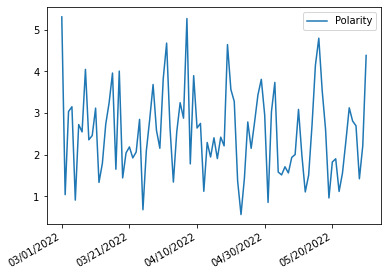

In [ ]:
dateToPolarity.plot()
plt.setp(plt.axes().get_xticklabels(), rotation=30, horizontalalignment='right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

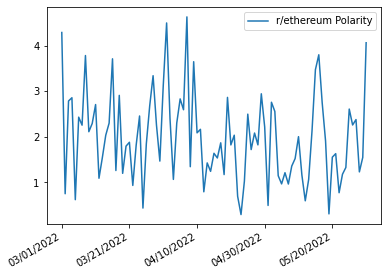

In [ ]:
dateToEthereumPolarity.plot()
plt.legend(["r/ethereum Polarity"])
plt.setp(plt.axes().get_xticklabels(), rotation=30, horizontalalignment='right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

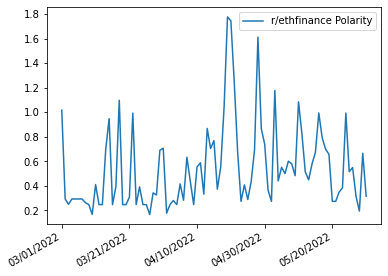

In [ ]:
dateToEthfinancePolarity.plot()
plt.legend(["r/ethfinance Polarity"])
plt.setp(plt.axes().get_xticklabels(), rotation=30, horizontalalignment='right')

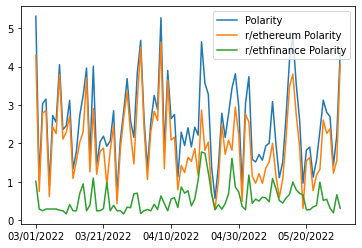

In [ ]:
ax = dateToPolarity.plot()
dateToEthereumPolarity.plot(ax=ax)
dateToEthfinancePolarity.plot(ax=ax)
plt.legend(["Polarity", "r/ethereum Polarity", "r/ethfinance Polarity"])

In [ ]:
weeklySentiments = []
dayCounter = 1
cumPolarity = 0
for i in dateToPosts.index:
  if dayCounter >= 8:
    weeklySentiments.append(cumPolarity)
    cumPolarity = 0
    dayCounter = 1
  cumPolarity += dateToPolarity['Polarity'][i]
  dayCounter += 1
weeklySentiments.append(cumPolarity)

In [ ]:
weeklySentiments

[18.72787075221015,
 17.852578376350756,
 18.548325173688376,
 16.150477564466865,
 19.79274334554094,
 22.470562723011973,
 14.318075532279574,
 17.64950906386266,
 19.023857399418866,
 14.056733354196986,
 19.354606415851343,
 13.526869116454115,
 18.971220211116318]

In [ ]:
weeklyDates = ['03/01/2022', '03/08/2022', '03/15/2022', '03/22/2022', '03/29/2022', '04/05/2022', '04/12/2022', '04/19/2022', '04/26/2022']
weeklyDates.extend(['05/03/2022', '05/10/2022', '05/17/2022', '05/24/2022'])
sentiments = pd.DataFrame(columns = ['Sentiment'], index=weeklyDates)
sentiments.loc[:,'Sentiment'] = weeklySentiments

In [ ]:
sentiments

,Sentiment
03/01/2022,18.727871
03/08/2022,17.852578
03/15/2022,18.548325
03/22/2022,16.150478
03/29/2022,19.792743
04/05/2022,22.470563
04/12/2022,14.318076
04/19/2022,17.649509
04/26/2022,19.023857
05/03/2022,14.056733


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

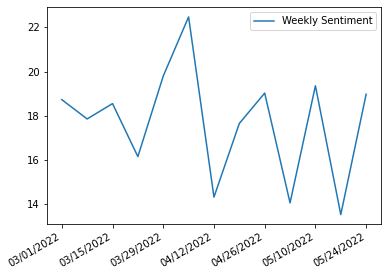

In [ ]:
sentiments.plot()
plt.legend(["Weekly Sentiment"])
plt.setp(plt.axes().get_xticklabels(), rotation=30, horizontalalignment='right')

In [ ]:
polarityJSON = pd.DataFrame.to_json(dateToPolarity)
polarityFile = open("polarity.json", "w")
json.dump(polarityJSON, polarityFile)
polarityFile.close()
ethereumPolarityJSON = pd.DataFrame.to_json(dateToEthereumPolarity)
ethereumPolarityFile = open("ethereumPolarity.json", "w")
json.dump(ethereumPolarityJSON, ethereumPolarityFile)
ethereumPolarityFile.close()
ethfinancePolarityJSON = pd.DataFrame.to_json(dateToEthfinancePolarity)
ethfinancePolarityFile = open("ethfinancePolarity.json", "w")
json.dump(ethfinancePolarityJSON, ethfinancePolarityFile)
ethfinancePolarityFile.close()

In [ ]:
sentimentsJSON = pd.DataFrame.to_json(sentiments)
sentimentsFile = open("sentiments.json", "w")
json.dump(sentimentsJSON, sentimentsFile)
sentimentsFile.close()